In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df= pd.read_csv('data/income_data_2017_clean_zeros.csv.bz2', compression='bz2', index_col='peridnum')

In [8]:
categorical_features = ['PEIOOCC', 'A_HGA', 'PRDTRACE', 'FKIND', 'A_CLSWKR', 'A_WKSTAT',
                       'A_MJIND', 'MJOCC', 'PTYN', 'LJCW', 'A_SEX', 'WEMOCG', 'MIG_CBST',
                       'MIGSAME', 'H_TYPE', 'H_LIVQRT', 'GTCBSA', 'GESTFIPS']
numerical_features = ['H_NUMPER', 'FPERSONS', 'FOWNU6', 'FOWNU18', 'A_AGE', 'A_HRS1',
                     'A_USLHRS', 'PHMEMPRS', 'HRSWK', 'HNUMFAM']
labels = ['ERN_VAL']
features = categorical_features + numerical_features

In [9]:
# converting colum names to uppercase
df.columns = df.columns.str.upper()

In [10]:
df_filt = df[features + labels]
df_filt = df_filt[(df_filt['ERN_VAL'] > 3000) & (df['ERN_VAL'] < 250000)]

In [11]:
categorical_index = [i for i,x in enumerate(df_filt.columns.values) if x in categorical_features]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

In [13]:
X = df_filt[features].values
y = (df_filt.ERN_VAL > 40000).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [14]:
steps = [('onehot', OneHotEncoder(categorical_features=categorical_index)),
        ('gradientboost', GradientBoostingClassifier(n_estimators=300,subsample=0.3
                                                     , learning_rate=0.2))]
pipeline = Pipeline(steps)

In [15]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('onehot', OneHotEncoder(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values='auto', sparse=True)), ('gradientboost', GradientBoostingClassifier(criterion='friedman_mse', init=None,
...      presort='auto', random_state=None, subsample=0.3, verbose=0,
              warm_start=False))])

In [16]:
print(pipeline.score(X_test, y_test))

0.807709082979


In [17]:
import sklearn.metrics as met
y_pred = pipeline.predict(X_test)
print(met.confusion_matrix(y_test,y_pred, labels=[0,1]))
print(met.f1_score(y_test,y_pred))

[[10387  1495]
 [ 2032  4428]]
0.715174028911


In [18]:
y_score = pipeline.decision_function(X_test)
fpr, tpr, threshold = met.roc_curve(y_test, y_score)

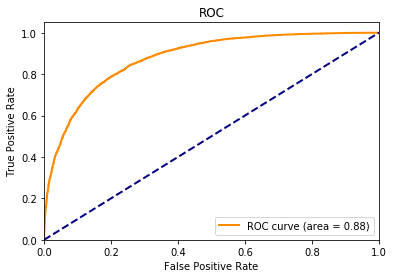

array([ 28.86283942,  27.10388967,  26.37343473, ...,  -4.686921  ,
        -4.68820798,  -6.37030381])

In [19]:
plt.figure()
lw = 2
auc = met.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = {:0.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()
threshold

In [20]:
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier

In [39]:
steps = [('onehot', OneHotEncoder(categorical_features=categorical_index)),
         ('tsvd', TruncatedSVD(n_components=50)),
        ('gradientboost', GradientBoostingClassifier(n_estimators=400,subsample=0.1
                                                     , learning_rate=0.06, warm_start=True))]
pipeline = Pipeline(steps)

In [42]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('onehot', OneHotEncoder(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values='auto', sparse=True)), ('tsvd', TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       ra...       presort='auto', random_state=None, subsample=0.1, verbose=0,
              warm_start=True))])

In [44]:
print(pipeline.score(X_train, y_train))

0.798964083691


In [57]:
categorical_features = ['PEIOOCC', 'A_HGA', 'PRDTRACE', 'FKIND', 'A_CLSWKR', 'A_WKSTAT',
                       'A_MJIND', 'MJOCC', 'PTYN', 'LJCW', 'WEMOCG', 'MIG_CBST',
                       'MIGSAME', 'H_TYPE', 'H_LIVQRT', 'GTCBSA', 'GESTFIPS']
numerical_features = ['H_NUMPER', 'FPERSONS', 'FOWNU6', 'FOWNU18', 'A_AGE', 'A_HRS1',
                     'A_USLHRS', 'PHMEMPRS', 'HRSWK', 'HNUMFAM', 'ERN_VAL']
labels = ['A_SEX']
features = categorical_features + numerical_features
# converting colum names to uppercase
df.columns = df.columns.str.upper()
df_filt = df[features + labels]
df_filt = df_filt[(df_filt['ERN_VAL'] > 3000) & (df['ERN_VAL'] < 250000)]
categorical_index = [i for i,x in enumerate(df_filt.columns.values) if x in categorical_features]
X = df_filt[features].values
y = (df_filt.A_SEX == 1 ).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [59]:
steps = [('onehot', OneHotEncoder(categorical_features=categorical_index)),
        ('gradientboost', GradientBoostingClassifier(n_estimators=300,subsample=0.3
                                                     , learning_rate=0.2))]
pipeline = Pipeline(steps)

In [60]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('onehot', OneHotEncoder(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values='auto', sparse=True)), ('gradientboost', GradientBoostingClassifier(criterion='friedman_mse', init=None,
    ...      presort='auto', random_state=None, subsample=0.3, verbose=0,
              warm_start=False))])

In [61]:
print(pipeline.score(X_test, y_test))

0.858957583688


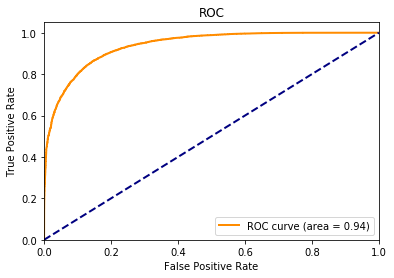

In [65]:
y_score = pipeline.decision_function(X_test)
fpr, tpr, threshold = met.roc_curve(y_test, y_score)
plt.figure()
lw = 2
auc = met.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = {:0.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [67]:
y_pred = pipeline.predict(X_test)
print(met.f1_score(y_test,y_pred))

0.869560832955
